# Data Description


| Feature                   | Description                                                                                  |
|---------------------------|----------------------------------------------------------------------------------------------|
| **ID**                    | Patient ID number.                                                                           |
| **Diagnosis**             | Diagnosis of breast tissues (M = malignant, B = benign).                                     |
| **Radius (mean, se, worst)** | Mean, standard error, and worst (largest) values for the radius (mean of distances from center to points on the perimeter). |
| **Texture (mean, se, worst)** | Mean, standard error, and worst values for texture (standard deviation of gray-scale values).  |
| **Perimeter (mean, se, worst)** | Mean, standard error, and worst values for the perimeter.                                    |
| **Area (mean, se, worst)** | Mean, standard error, and worst values for the area.                                             |
| **Smoothness (mean, se, worst)** | Mean, standard error, and worst values for smoothness (local variation in radius lengths).   |
| **Compactness (mean, se, worst)** | Mean, standard error, and worst values for compactness (perimeter^2 / area - 1.0).          |
| **Concavity (mean, se, worst)** | Mean, standard error, and worst values for concavity (severity of concave portions of the contour). |
| **Concave points (mean, se, worst)** | Mean, standard error, and worst values for concave points (number of concave portions of the contour). |
| **Symmetry (mean, se, worst)** | Mean, standard error, and worst values for symmetry.                                          |
| **Fractal dimension (mean, se, worst)** | Mean, standard error, and worst values for fractal dimension (“coastline approximation” - 1). |


# Loading Data

In [64]:
import pandas as pd

df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
# Pandas Profiling

# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="Breast Cancer Dataset Profiling Report")

# # To display the report within a Jupyter Notebook
# profile.to_notebook_iframe()

# # To save the report as an HTML file
# profile.to_file("breast_cancer_profiling_report.html")

In [66]:
# pip install --upgrade numba pandas-profiling


In [67]:
df.describe().T.style.format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
id,569.00,30371831.43,125020585.61,8670.00,869218.00,906024.00,8813129.00,911320502.00
radius_mean,569.00,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture_mean,569.00,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter_mean,569.00,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area_mean,569.00,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
smoothness_mean,569.00,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness_mean,569.00,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity_mean,569.00,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave points_mean,569.00,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry_mean,569.00,0.18,0.03,0.11,0.16,0.18,0.20,0.30


In [68]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [69]:
data = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [70]:
data.isna().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [71]:
data.diagnosis = data.diagnosis.map({'M': 1, 'B': 0})

C:\Users\ahmad\AppData\Local\Temp\ipykernel_24980\3033214844.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
data.corr().style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


In [73]:
data2 = data.drop(['radius_mean', 'concavity_mean', 'fractal_dimension_mean' ], axis=1)
data2.corr().style.background_gradient(cmap='coolwarm')

,diagnosis,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean
diagnosis,1.000000,0.415185,0.742636,0.708984,0.358560,0.596534,0.776614,0.330499
texture_mean,0.415185,1.000000,0.329533,0.321086,-0.023389,0.236702,0.293464,0.071401
perimeter_mean,0.742636,0.329533,1.000000,0.986507,0.207278,0.556936,0.850977,0.183027
area_mean,0.708984,0.321086,0.986507,1.000000,0.177028,0.498502,0.823269,0.151293
smoothness_mean,0.358560,-0.023389,0.207278,0.177028,1.000000,0.659123,0.553695,0.557775
compactness_mean,0.596534,0.236702,0.556936,0.498502,0.659123,1.000000,0.831135,0.602641
concave points_mean,0.776614,0.293464,0.850977,0.823269,0.553695,0.831135,1.000000,0.462497
symmetry_mean,0.330499,0.071401,0.183027,0.151293,0.557775,0.602641,0.462497,1.000000


In [74]:
data2.corr()['diagnosis']

diagnosis              1.000000
texture_mean           0.415185
perimeter_mean         0.742636
area_mean              0.708984
smoothness_mean        0.358560
compactness_mean       0.596534
concave points_mean    0.776614
symmetry_mean          0.330499
Name: diagnosis, dtype: float64

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

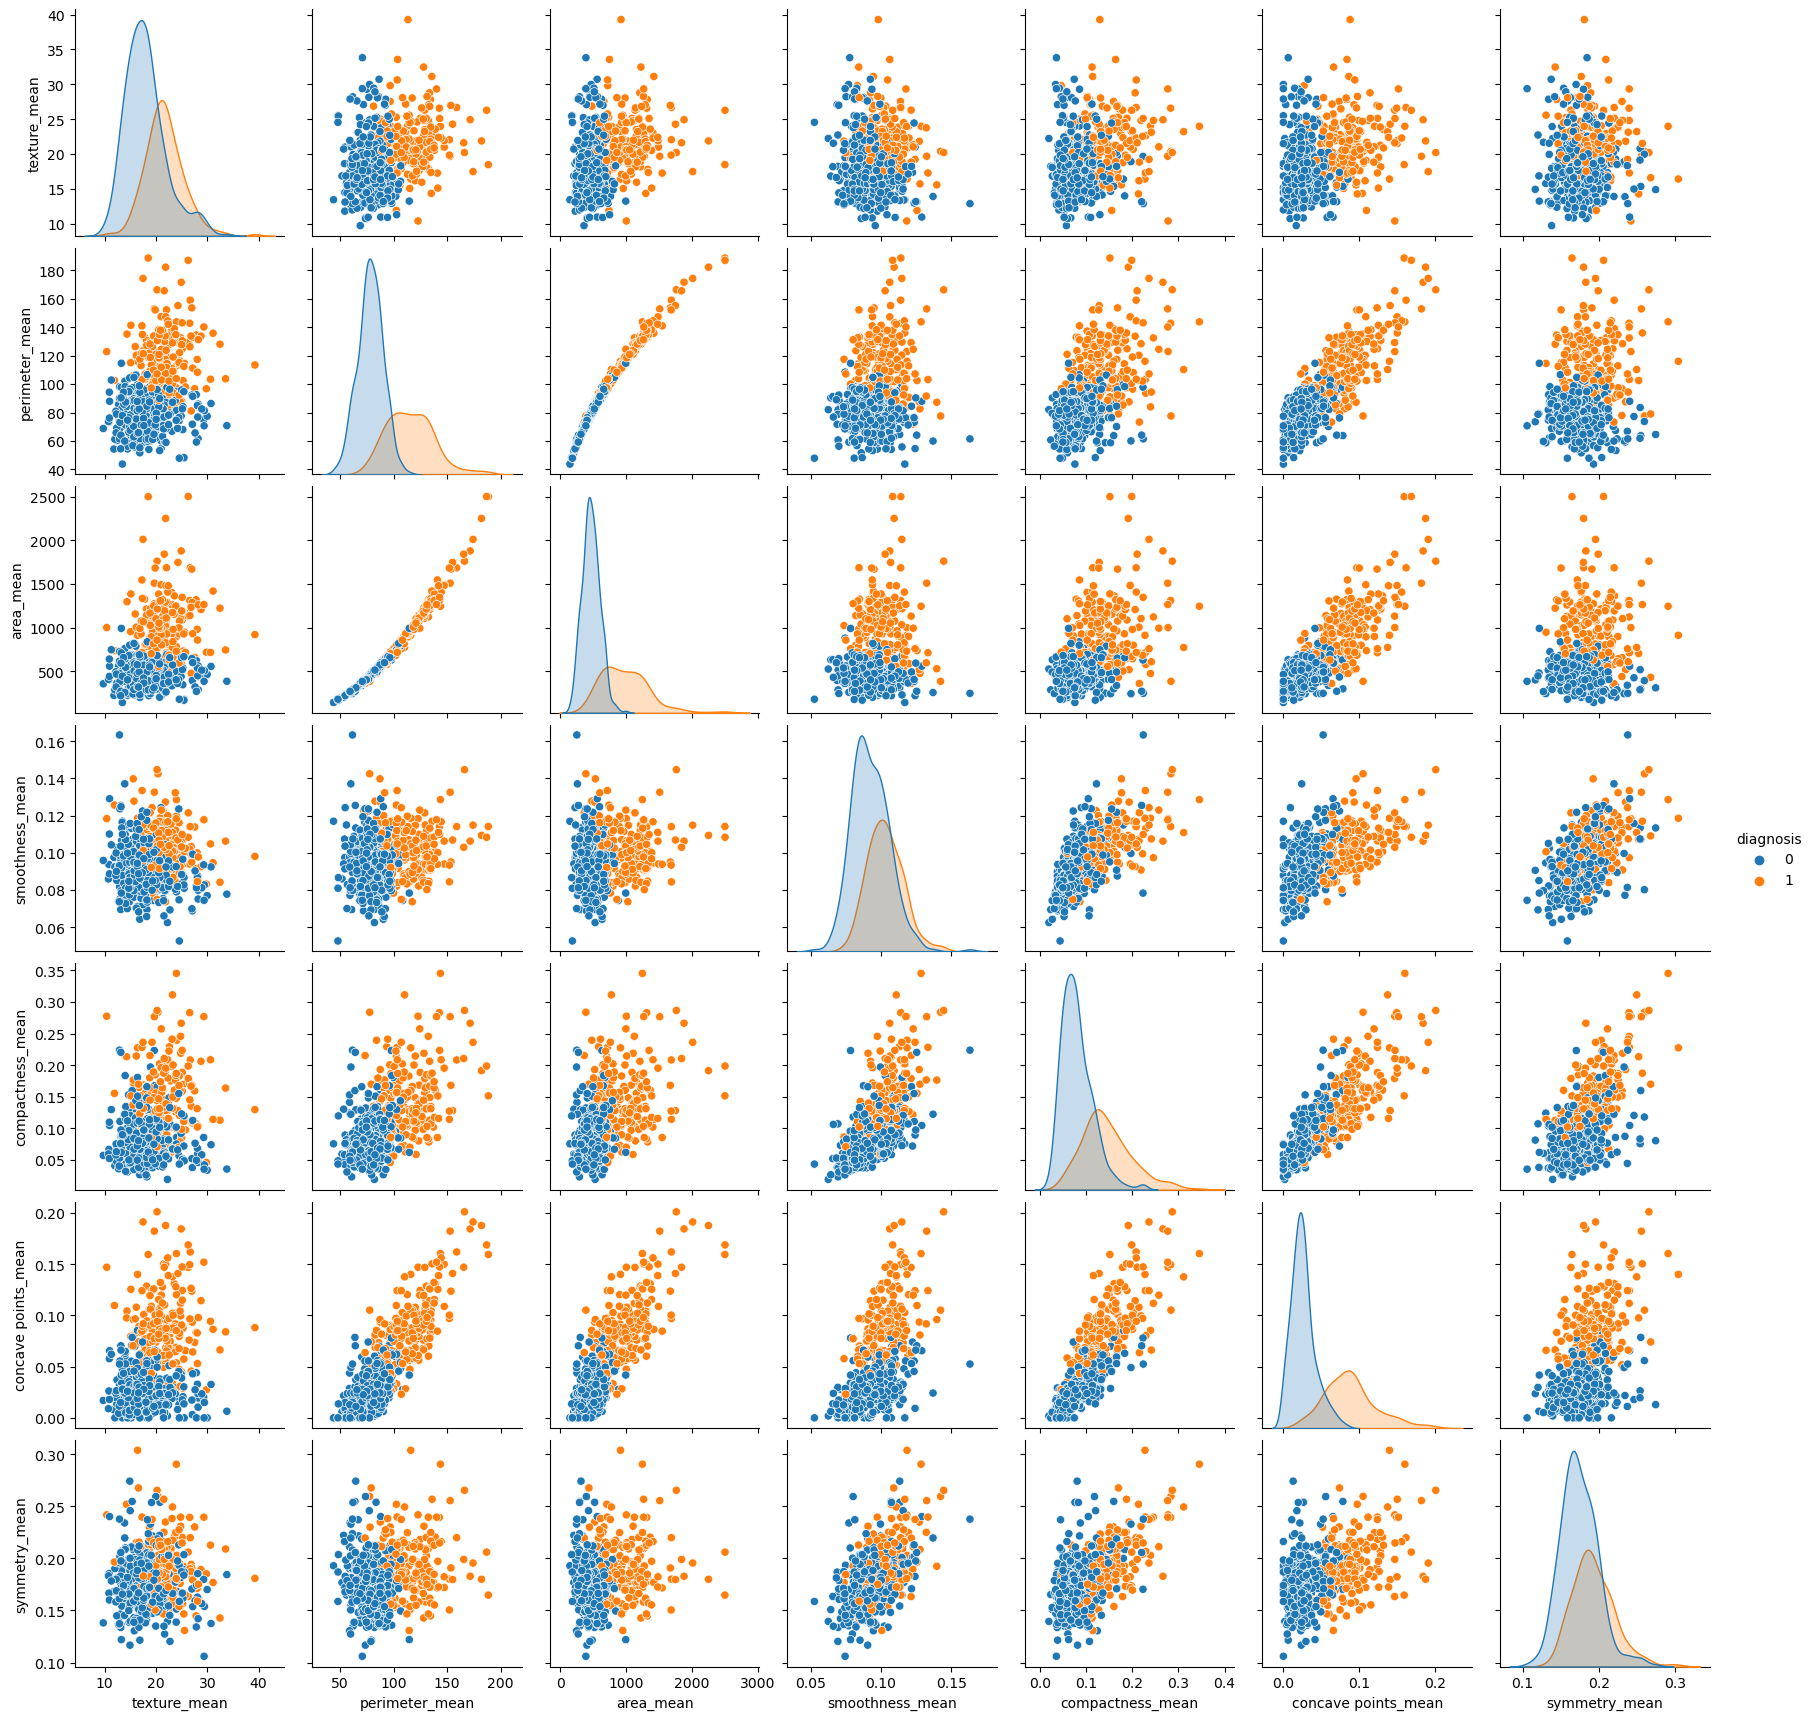

In [75]:
import seaborn as sns


sns.pairplot(data2, hue='diagnosis')

In [76]:
data2.describe()

,diagnosis,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,19.289649,91.969033,654.889104,0.096360,0.104341,0.048919,0.181162
std,0.483918,4.301036,24.298981,351.914129,0.014064,0.052813,0.038803,0.027414
min,0.000000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.106000
25%,0.000000,16.170000,75.170000,420.300000,0.086370,0.064920,0.020310,0.161900
50%,0.000000,18.840000,86.240000,551.100000,0.095870,0.092630,0.033500,0.179200
75%,1.000000,21.800000,104.100000,782.700000,0.105300,0.130400,0.074000,0.195700
max,1.000000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.201200,0.304000


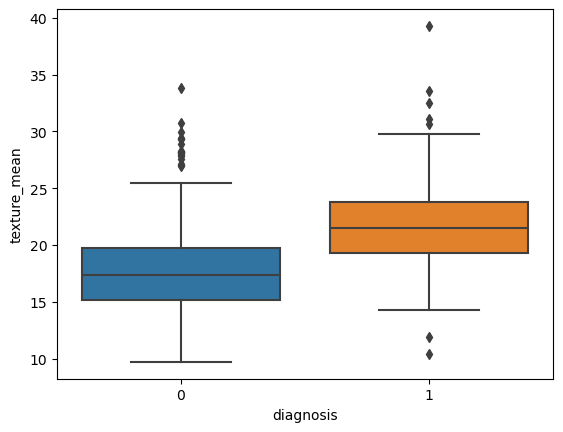

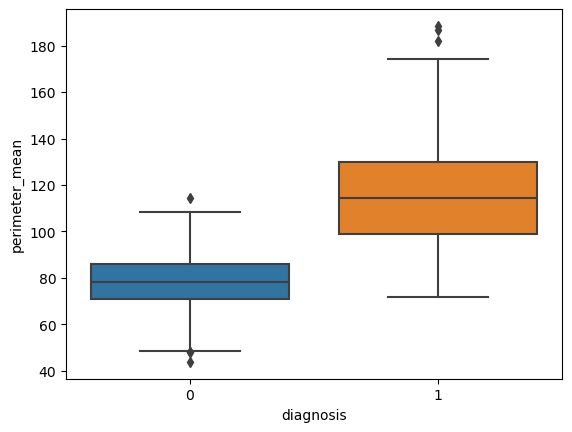

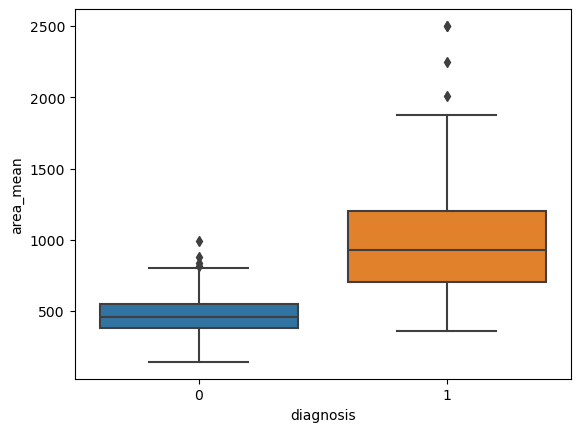

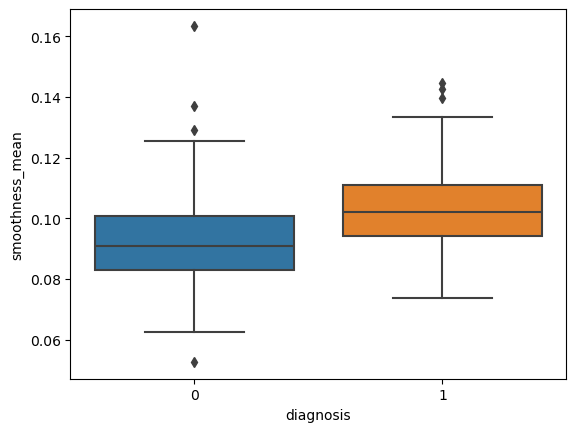

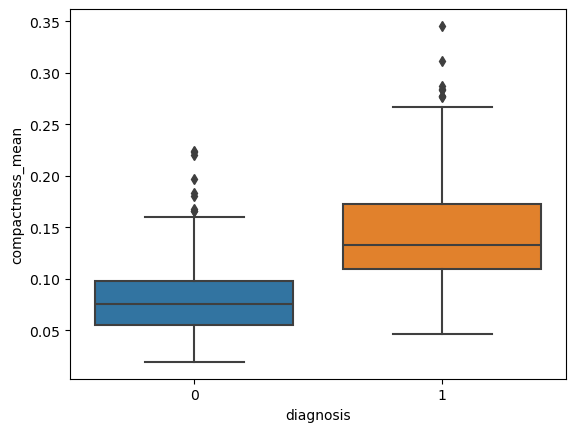

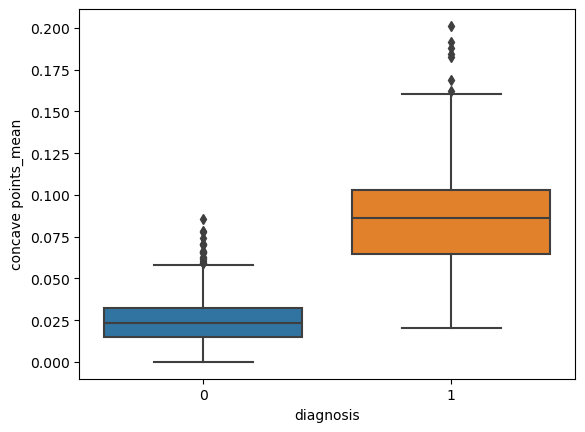

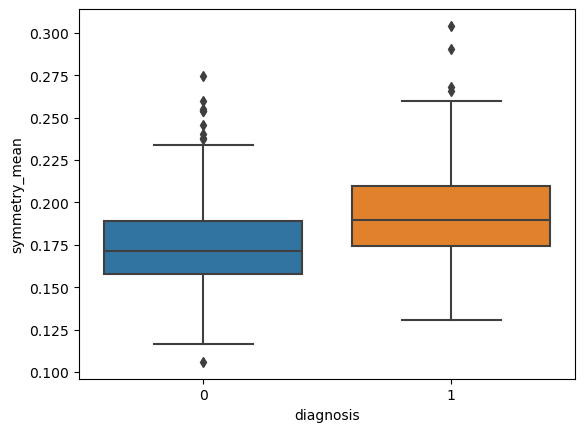

In [77]:
import matplotlib.pyplot as plt
for col in data2.drop('diagnosis', axis=1).columns:
    sns.boxplot(x='diagnosis', y=col, data=data2)
    plt.show()

In [78]:
from sklearn.model_selection import train_test_split
X = data2.drop('diagnosis', axis=1)
y = data2['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression


pipe = Pipeline([('scaler', RobustScaler()), ('lr', LogisticRegression())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('lr', LogisticRegression())])

In [80]:
pipe.score(X_test, y_test)

0.9649122807017544

In [81]:
import pickle

pickle.dump(pipe, open('log_reg_model.pkl', 'wb'))

In [82]:
data2.to_csv('cleaned_data.csv', index=False)

In [83]:
data2.drop('diagnosis', axis=1).columns

Index(['texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
       'compactness_mean', 'concave points_mean', 'symmetry_mean'],
      dtype='object')

In [84]:
%%writefile breast_cancer.py

import pandas as pd
import streamlit as st
import pickle


model = pickle.load(open('log_reg_model.pkl', 'rb'))

st.title('Breast Cancer Classifier')


texture_mean = st.slider('texture_mean')
perimeter_mean = st.number_input('perimeter_mean')
area_mean = st.number_input('area_mean')
smoothness_mean = st.number_input('smoothness_mean')
compactness_mean = st.number_input('compactness_mean')
concave_points_mean = st.number_input('concave points_mean')
symmetry_mean = st.number_input('symmetry_mean')


dic = {
    'texture_mean': texture_mean, 'perimeter_mean': perimeter_mean, 'area_mean': area_mean, 
    'smoothness_mean': smoothness_mean, 'compactness_mean': compactness_mean,
    'concave points_mean': concave_points_mean, 'symmetry_mean': symmetry_mean}    

df = pd.DataFrame(dic, index=[0])
st.write(df)

prediction = model.predict(df)
st.write(prediction[0])



Overwriting breast_cancer.py


In [85]:
# !streamlit run breast_cancer.py

In [86]:
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
scores=[]
for k in range(2,20):
    pipe = Pipeline([('scaler', RobustScaler()), ('knn', KNeighborsClassifier(n_neighbors= k))])
    pipe.fit(X_train, y_train)
    scores.append(pipe.score(X_test, y_test))
px.line(x=range(2,20), y=scores)

In [87]:
i = len(X) // 5

In [88]:
i1 =  i
i2 = 2 * i
i3 = 3 * i
i4 = 4 * i

print(i1, i2, i3, i4)

113 226 339 452


In [89]:
i3 - i2

113

In [90]:
X_1 = X[:i1]
X_2 = X[i1:i2]
X_3 = X[i2:i3]
X_4 = X[i3:i4]
X_5 = X[i4:]

In [91]:
print(X_1.shape, X_2.shape, X_3.shape, X_4.shape, X_5.shape)

(113, 7) (113, 7) (113, 7) (113, 7) (117, 7)


In [92]:
y_1 = y[:i1]
y_2 = y[i1:i2]
y_3 = y[i2:i3]
y_4 = y[i3:i4]
y_5 = y[i4:]

In [93]:
import numpy as np

scores=[]
for k in range(2,20):
    pipe = Pipeline([('scaler', RobustScaler()), ('knn', KNeighborsClassifier(n_neighbors= k))])
    
    valid_scores=[]
    # fold 1
    X_train = pd.concat([X_1, X_2, X_3, X_4])
    y_train = pd.concat([y_1, y_2, y_3, y_4])
    pipe.fit(X_train, y_train)
    valid_scores.append(pipe.score(X_5, y_5))

    # fold 2
    X_train = pd.concat([X_2, X_3, X_4, X_5])
    y_train = pd.concat([y_2, y_3, y_4, y_5])
    pipe.fit(X_train, y_train)
    valid_scores.append(pipe.score(X_1, y_1))

    # fold 3
    X_train = pd.concat([X_3, X_4, X_5, X_1])
    y_train = pd.concat([y_3, y_4, y_5, y_1])
    pipe.fit(X_train, y_train)
    valid_scores.append(pipe.score(X_2, y_2))

    # fold 4
    X_train = pd.concat([X_4, X_5, X_1, X_2])
    y_train = pd.concat([y_4, y_5, y_1, y_2])
    pipe.fit(X_train, y_train)
    valid_scores.append(pipe.score(X_3, y_3))

    # fold 5
    X_train = pd.concat([X_5, X_1, X_2, X_3])
    y_train = pd.concat([y_5, y_1, y_2, y_3])
    pipe.fit(X_train, y_train)
    valid_scores.append(pipe.score(X_4, y_4))

    scores.append(np.mean(valid_scores))

px.line(x=range(2,20), y=scores)

In [94]:
from sklearn.model_selection import train_test_split
X = data2.drop('diagnosis', axis=1)
y = data2['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.936183574879227, 0.020808249970160796)

In [96]:
import numpy as np

scores=[]
for k in range(2,20):
    pipe1 = Pipeline([('scaler', RobustScaler()), ('knn', KNeighborsClassifier(n_neighbors= k))])
    scores_ = cross_val_score(pipe1, X_train, y_train, cv=5)
    scores.append(np.mean(scores_))

px.line(x=range(2,20), y=scores)

In [97]:
pipe1 = Pipeline([('scaler', RobustScaler()), ('knn', KNeighborsClassifier(n_neighbors= 9))])
pipe1.fit(X_train, y_train)
pipe1.score(X_test, y_test)

0.956140350877193

In [98]:
scores=[]
for c in [0.01, 0.1, 1, 10, 100]:
    pipe2 = Pipeline([('scaler', RobustScaler()), ('log', LogisticRegression(C=c))])
    scores_ = cross_val_score(pipe2, X_train, y_train, cv=5)
    scores.append(np.mean(scores_))

px.line(x=[0.01, 0.1, 1, 10, 100], y=scores, markers=True)

In [99]:
pipe2 = Pipeline([('scaler', RobustScaler()), ('log', LogisticRegression(C=10))])
pipe2.fit(X_train, y_train)
pipe2.score(X_test, y_test)

0.9385964912280702

In [100]:
d = {'LogisticRegression': pipe2.score(X_test, y_test), 'KNeighborsClassifier': pipe1.score(X_test, y_test)}
pd.DataFrame.from_dict(d, orient='index', columns=['Accuracy'])

,Accuracy
LogisticRegression,0.938596
KNeighborsClassifier,0.956140


In [101]:
# Grid Search

from sklearn.model_selection import GridSearchCV
params = {'log__C': [0.01, 0.1, 1, 10, 100], 'log__penalty': ['l1', 'l2'], 'log__solver': ['liblinear']}
grid = GridSearchCV(pipe2, params, cv=5)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.945054945054945,
 {'log__C': 10, 'log__penalty': 'l1', 'log__solver': 'liblinear'})

In [102]:
# params =  [
#     {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear']},
#     {'penalty': ['elasticnet', 'l1'], 'C': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9], 'solver': ['saga']}
# ]

# grid = GridSearchCV(pipe2, params, cv=5)
# grid.fit(X_train, y_train)
# grid.best_score_, grid.best_params_

In [103]:
from sklearn.metrics import confusion_matrix

y_pred = pipe1.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[68,  3],
       [ 2, 41]], dtype=int64)

In [104]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('True Positive: ', tp)
print('False Positive: ', fp)
print('True Negative: ', tn)
print('False Negative: ', fn)

True Positive:  41
False Positive:  3
True Negative:  68
False Negative:  2


<Axes: >

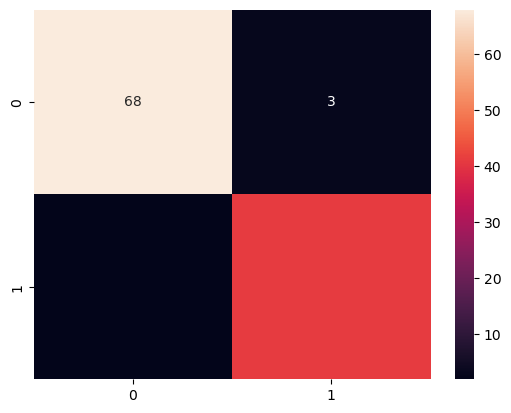

In [105]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

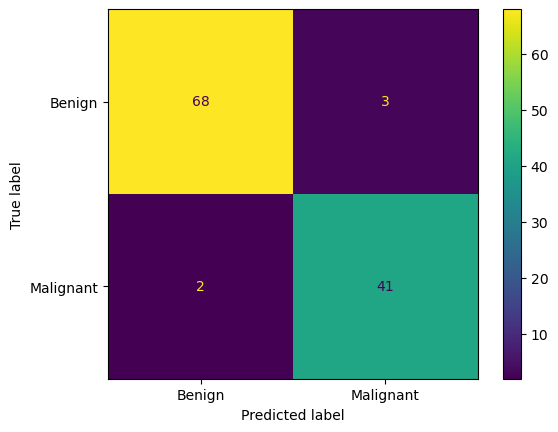

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(pipe1, X_test, y_test, display_labels=['Benign', 'Malignant'])

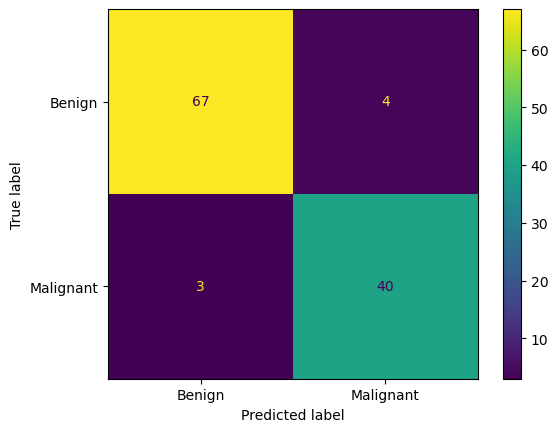

In [107]:
y_pred = pipe2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Benign', 'Malignant'])

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))   
print('Recall: ', recall_score(y_test, y_pred))
print('F1-Score', f1_score(y_test, y_pred))

Accuracy:  0.9385964912280702
Precision:  0.9090909090909091
Recall:  0.9302325581395349
F1-Score 0.9195402298850575


In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [110]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, pos_label=0))   
print('Recall: ', recall_score(y_test, y_pred, pos_label=0))
print('F1-Score', f1_score(y_test, y_pred, pos_label=0))

Accuracy:  0.9385964912280702
Precision:  0.9571428571428572
Recall:  0.9436619718309859
F1-Score 0.9503546099290779


In [111]:
pr = 0.90
re = 0.1

f1 = 2 * (pr * re) / (pr + re)
print(f1)

0.18000000000000002


In [112]:
avg = (pr + re) / 2
print(avg)

0.5


In [113]:
y_proba = pipe2.predict_proba(X_test).round(2)
y_proba

array([[0.94, 0.06],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.69, 0.31],
       [1.  , 0.  ],
       [0.87, 0.13],
       [0.05, 0.95],
       [0.95, 0.05],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.92, 0.08],
       [0.97, 0.03],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.44, 0.56],
       [1.  , 0.  ],
       [0.94, 0.06],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.46, 0.54],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.66, 0.34],
       [0.99, 0.01],
       [0.02, 0.98],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.19, 0.81],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.99,

In [114]:
np.argmax(y_proba, axis=1)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

In [115]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

In [116]:
y_pred = y_proba[:,1]
y_pred

array([0.06, 1.  , 0.98, 0.01, 0.  , 1.  , 1.  , 0.97, 0.31, 0.  , 0.13,
       0.95, 0.05, 1.  , 0.  , 1.  , 0.02, 0.  , 0.  , 1.  , 0.08, 0.03,
       1.  , 0.  , 0.02, 0.56, 0.  , 0.06, 0.01, 1.  , 0.03, 0.  , 0.02,
       0.01, 0.  , 0.02, 0.54, 0.  , 1.  , 0.34, 0.01, 0.98, 0.03, 0.  ,
       0.81, 0.01, 0.  , 0.01, 0.02, 0.  , 0.99, 1.  , 0.37, 0.6 , 0.01,
       0.01, 0.01, 1.  , 0.39, 0.  , 0.01, 1.  , 1.  , 0.2 , 0.  , 0.02,
       1.  , 1.  , 0.01, 0.03, 0.92, 0.82, 0.03, 0.99, 0.  , 0.07, 0.04,
       0.32, 0.  , 0.07, 0.95, 0.  , 0.71, 1.  , 0.98, 1.  , 0.92, 1.  ,
       0.  , 0.01, 0.01, 0.06, 0.38, 0.01, 0.01, 0.  , 1.  , 1.  , 0.  ,
       0.97, 0.75, 0.  , 1.  , 1.  , 0.01, 0.04, 0.04, 1.  , 0.21, 0.02,
       0.94, 0.01, 0.56, 1.  ])

In [117]:
y_pred = y_proba[:,1] >= 0.5
y_pred

array([False,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False,  True,  True, False, False,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
       False, False,  True, False,  True,  True])

In [118]:
y_pred = (y_proba[:,1] >= 0.5).astype(int)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [119]:
y_pred1 = y_proba[:,1] >= 0.8  # Increase False Negative
y_pred2 = y_proba[:,1] >= 0.2  # Increase False Positive

In [120]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        71
           1       0.97      0.86      0.91        43

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



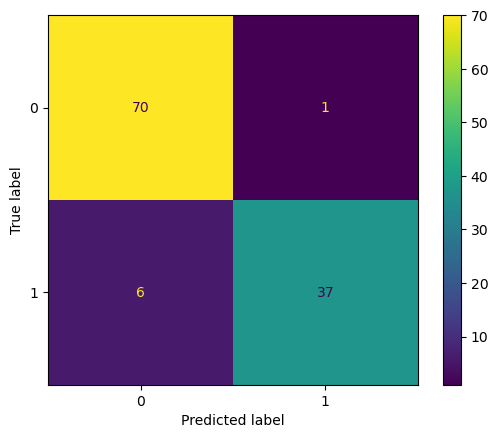

In [121]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)

In [122]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92        71
           1       0.81      0.98      0.88        43

    accuracy                           0.90       114
   macro avg       0.90      0.92      0.90       114
weighted avg       0.92      0.90      0.90       114



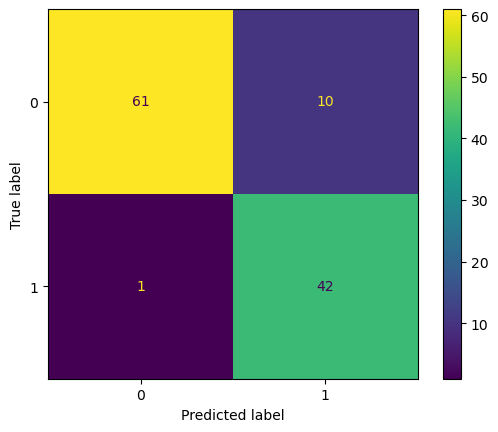

In [123]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)

In [124]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])
pr_re = pd.DataFrame({'Thresholds': thresholds, 'Precision': precisions[:-1], 'Recall': recalls[:-1]})
pr_re

,Thresholds,Precision,Recall
0,0.00,0.377193,1.000000
1,0.01,0.467391,1.000000
2,0.02,0.573333,1.000000
3,0.03,0.632353,1.000000
4,0.04,0.682540,1.000000
5,0.05,0.716667,1.000000
6,0.06,0.728814,1.000000
7,0.07,0.767857,1.000000
8,0.08,0.796296,1.000000
9,0.13,0.792453,0.976744


In [128]:
import plotly.express as px
px.line(x='Thresholds', y='Precision', data_frame= pr_re)

In [129]:
px.line(x='Thresholds', y='Recall', data_frame= pr_re)

In [130]:
px.line(x='Recall', y='Precision', data_frame= pr_re)

In [137]:
# Recall >=0.9

pr_re[pr_re['Recall']>=0.9].nlargest(1, 'Thresholds')['Thresholds'].values[0]

0.71

In [139]:
pr_re[pr_re['Recall']>=0.9]['Thresholds'].max()

0.71

In [140]:
# Precision >=0.9
pr_re[pr_re['Precision']>=0.9]['Thresholds'].min()

0.39

In [141]:
from sklearn.metrics import roc_curve
fpr, tpr , thresholds = roc_curve(y_test, y_proba[:,1])
roc = pd.DataFrame({'ThresFholds': thresholds, 'FPR': fpr, 'TPR': tpr})
roc

,ThresFholds,FPR,TPR
0,2.00,0.000000,0.000000
1,1.00,0.000000,0.558140
2,0.99,0.000000,0.604651
3,0.98,0.000000,0.674419
4,0.95,0.000000,0.767442
5,0.94,0.000000,0.790698
6,0.92,0.000000,0.837209
7,0.82,0.000000,0.860465
8,0.81,0.014085,0.860465
9,0.71,0.014085,0.906977


In [143]:
px.line(roc, 'FPR', 'TPR')

In [158]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train, y_train)
y_proba_dummy = clf.predict_proba(X_test)

In [161]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [159]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])

# DataFrame
df = pd.DataFrame({'Threshold': thresholds, 'FPR': fpr, 'TPR': tpr})
df.sample(10)

,Threshold,FPR,TPR
17,0.07,0.183099,1.000000
19,0.05,0.239437,1.000000
1,1.00,0.000000,0.558140
21,0.03,0.352113,1.000000
2,0.99,0.000000,0.604651
15,0.13,0.154930,0.976744
14,0.32,0.098592,0.976744
8,0.81,0.014085,0.860465
4,0.95,0.000000,0.767442
20,0.04,0.281690,1.000000


In [162]:
y_proba1 = pipe1.predict_proba(X_test).round(2)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_proba1[:, 1])


In [163]:
fpr_dummy, tpr_dummy, thresholds_dummy = roc_curve(y_test, y_proba_dummy[:, 1])

# plot
fig = px.line(df, x='FPR', y='TPR', title='ROC Curve', width=800, height=600, hover_data=['Threshold'])
fig.add_scatter(x=fpr_dummy, y=tpr_dummy, mode='lines', name='Dummy Classifier', line=dict(dash='dash'))
fig.add_scatter(x=fpr1, y=tpr1, mode='lines', name='model Classifier')

fig.show()

In [165]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba[:,1])

0.9908286930887651

In [166]:
roc_auc_score(y_test, y_proba1[:,1])

0.9903373730756633

In [ ]:
# from sklearn.model_selection import GridSearchCV
# params = {'log__C': [0.01, 0.1, 1, 10, 100], 'log__penalty': ['l1', 'l2'], 'log__solver': ['liblinear']}
# grid = GridSearchCV(pipe2, params, cv=5, scoring='roc_auc')
# grid.fit(X_train, y_train)
# grid.best_score_, grid.best_params_

In [168]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('Train ACC:', tree.score(X_train, y_train))
print('Test ACC:', tree.score(X_test, y_test))

Train ACC: 1.0
Test ACC: 0.9035087719298246


In [192]:
tree = DecisionTreeClassifier(max_depth= 5)
tree.fit(X_train, y_train)
print('Train ACC:', tree.score(X_train, y_train))
print('Test ACC:', tree.score(X_test, y_test))

Train ACC: 0.9868131868131869
Test ACC: 0.956140350877193


In [170]:
tree = DecisionTreeClassifier(max_depth= 3)
tree.fit(X_train, y_train)
print('Train ACC:', tree.score(X_train, y_train))
print('Test ACC:', tree.score(X_test, y_test))

Train ACC: 0.9560439560439561
Test ACC: 0.956140350877193


In [190]:
tree = DecisionTreeClassifier(max_depth= 1)
tree.fit(X_train, y_train)
print('Train ACC:', tree.score(X_train, y_train))
print('Test ACC:', tree.score(X_test, y_test))

Train ACC: 0.9208791208791208
Test ACC: 0.8947368421052632


In [181]:
tree = DecisionTreeClassifier(min_samples_split=100)
tree.fit(X_train, y_train)
print('Train ACC:', tree.score(X_train, y_train))
print('Test ACC:', tree.score(X_test, y_test))

Train ACC: 0.9296703296703297
Test ACC: 0.9473684210526315


In [188]:
tree = DecisionTreeClassifier(min_samples_split=50)
tree.fit(X_train, y_train)
print('Train ACC:', tree.score(X_train, y_train))
print('Test ACC:', tree.score(X_test, y_test))

Train ACC: 0.9296703296703297
Test ACC: 0.9473684210526315


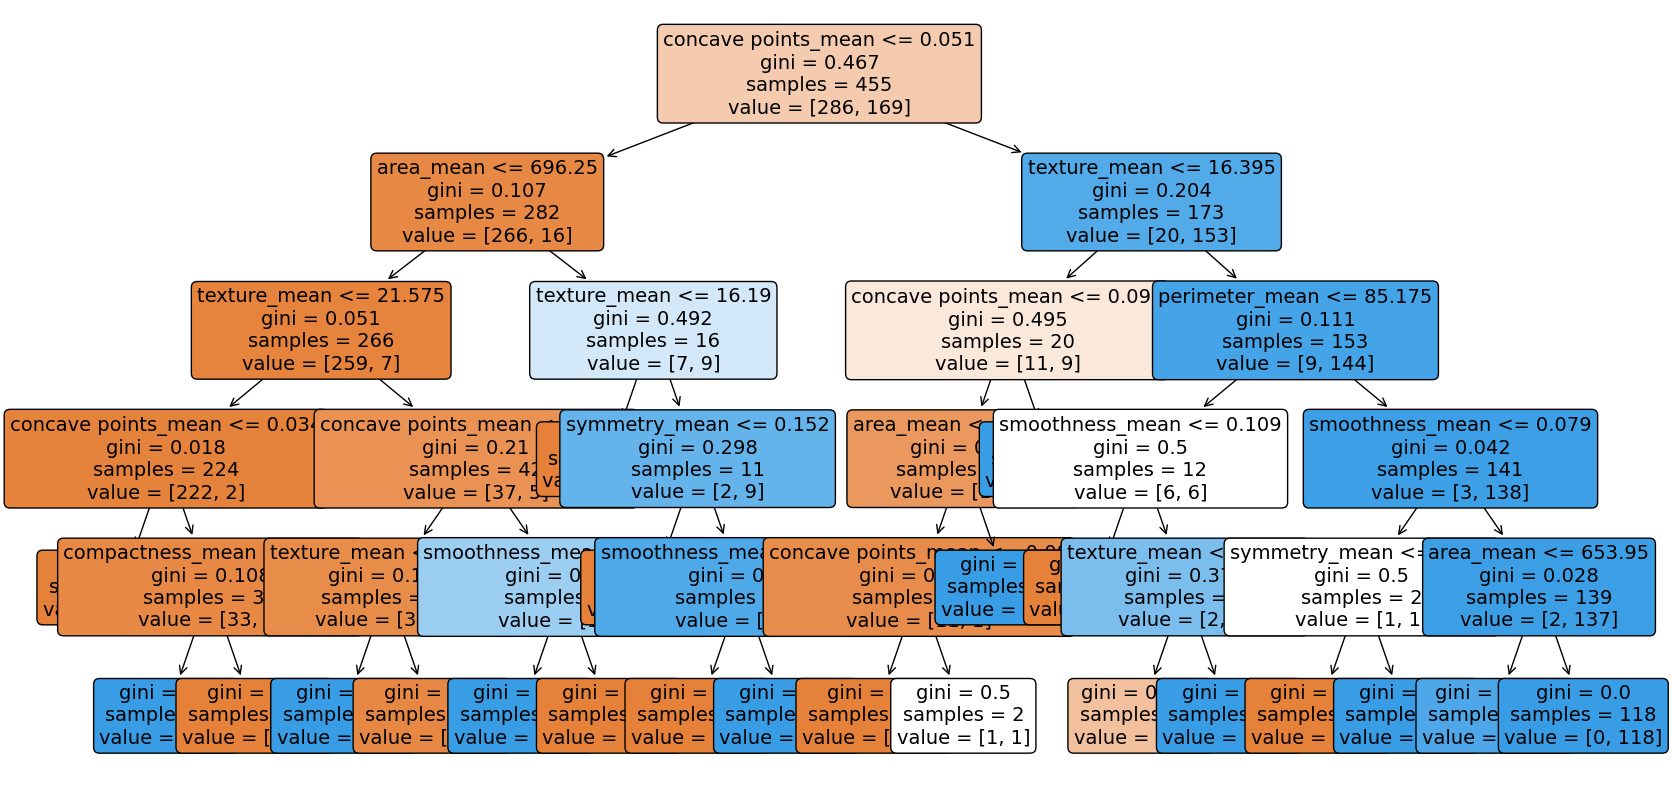

In [193]:
# Visualization
from sklearn.tree import plot_tree


plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, fontsize=14)
plt.show()

In [194]:
tree.feature_importances_

array([0.0858852 , 0.02500471, 0.05205576, 0.03484309, 0.01860456,
       0.77140865, 0.01219803])

<Axes: >

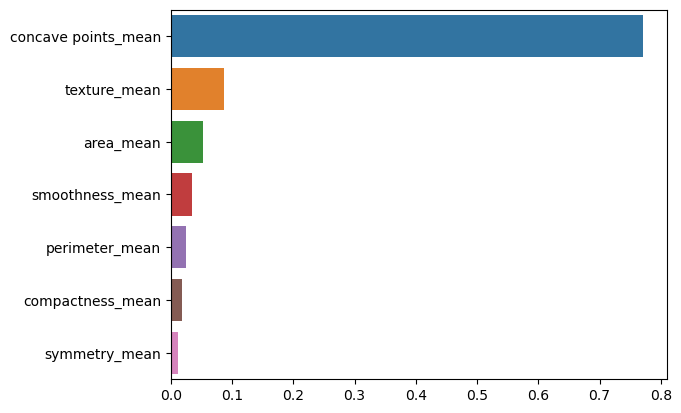

In [195]:
# plot feature importance in descending order
feature_imp = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)